# ***POS TAGGING***

## **Introduction**

Introduction
POS tagging or Part of speech tagging is the process of assigning grammatical tags to the words in a sentence. These tags represent the syntactic category or part of speech of each word, such as noun, verb, adjective, and so on. POS tagging is essential in natural language processing tasks like extracting information, analyzing sentiment, and translating languages.

Understanding the function of each word in a sentence is made easier by POS tagging. POS tagging groups words into multiple categories depending on their grammatical functions, much as how humans classify objects into different sorts (such as animals, fruits, and cars). We can accurately carry out a variety of language processing tasks thanks to this categorization, including sentence meaning extraction.

## **Dataset**

The dataset offered for POS tagging is made up of tagged sentences from the Treebank corpus, a well-known annotated corpus in the field of natural language processing. The dataset is organized as a list of sentences, with each phrase represented by a list of word-tag pairs.

Here is the explanation of each file:

1. train.pos: This file contains the labeled training data for part-of-speech (POS) tagging. Each line in the file represents a sentence, where each word is followed by its corresponding POS tag.
2. test.pos: This file contains the labeled test data for POS tagging. It follows the same format as the train.pos file, with each line representing a sentence and each word followed by its POS tag.
3. hmv.txt: This file contains a list of special tokens that you want to use as additional context or information during the POS tagging process. These tokens are typically inserted at the beginning and end of each sentence to provide contextual information. For example, <@> and </@> can be used as special start and end tokens. The specific purpose and usage of these special tokens may vary depending on the POS tagging implementation.
4. test.words: This file contains the raw sentences or words that you want to perform POS tagging on. Each line in the file represents a sentence, where words are separated by spaces.

# HMM (Hidden Markov Model)

Hidden Markov Models (HMMs) POS tagging is a natural language processing technique that assigns POS tags to words in a given text. It uses HMM probabilistic modeling to estimate the most likely sequence of POS tags for a given word sequence.

The words in a phrase are handled as observable states in this technique, whereas the POS tags are treated as hidden states. The HMM model is trained on annotated data in which each word is paired with a POS tag. Given the hidden states, the model learns the transition probabilities between hidden states (POS tags) and the emission probabilities of observable states (words).
The Viterbi method is used by the HMM model during the tagging process to determine the best sequence of POS tags for a given series of words. The algorithm computes the likelihood of several tag sequences and chooses the one with the highest probability, taking into account both transition and emission probabilities.

HMM-based POS tagging can capture the contextual dependencies and syntactic patterns of words inside a sentence. It has been widely employed in a variety of NLP applications, including information extraction, text categorization, and machine translation, to improve textual data interpretation and subsequent language processing tasks.

The goal of POS tagging with HMMs is to find the most likely sequence of hidden states (POS tags) given a sequence of observable states (words). This is achieved using the Viterbi algorithm, which calculates the probability of each possible tag sequence and selects the one with the highest probability.


Example:

Input sentence: "The cat is sleeping"

Output sequence of POS tags: DET NOUN VERB VERB

Basically the HMM model assigns a POS tag to each word in the input sentence based on the observed words and the probabilities learned from training data. In this example, the HMM predicts that "The" is a determiner (DET), "cat" is a noun (NOUN), "is" and "sleeping" are verbs (VERB).


## Formula


Formula for using Hidden Markov Models (HMMs) for POS tagging:
Given:

T: Number of POS tags in the tag set.

N: Number of words in the sentence.

O: Sequence of observed words (o1, o2, ..., oN).

Q: Sequence of hidden POS tags (q1, q2, ..., qN).

1. Transition Probability (A):

 * A(i, j) = P(qj | qi), the probability of transitioning from POS tag qi to POS tag qj.
 * This probability represents the likelihood of moving from one POS tag to another in the tag sequence.

2. Emission Probability (B):

 * B(j, k) = P(Ok | qj), the probability of emitting word Ok given POS tag qj.
 * This probability captures the likelihood of observing a particular word given a specific POS tag.

3. Initial Probability (π):

 * π(i) = P(q1 = qi), the probability of the initial hidden state being POS tag qi.
 * This probability represents the likelihood of starting the sequence with a particular POS tag.



Viterbi Algorithm:

 * Viterbi algorithm is used to find the most likely sequence of hidden states
  (POS tags) given the observed sequence of words.
 * It involves calculating the probability of the optimal path at each position using dynamic programming.
 * The probability at each position is determined by the maximum of the probabilities of the previous positions, taking into account the transition and emission probabilities.

The goal is to find the sequence of hidden states (POS tags) Q* that maximizes the probability:

Q* = argmax P(Q | O) = argmax P(O | Q) * P(Q)

   = argmax π(q1) * ∏[i=2 to N] A(qi-1, qi) * ∏[i=1 to N] B(qi, oi)


By maximizing this probability, we obtain the most likely sequence of POS tags for the given sequence of observed words.

# Importing libraries

In [88]:
import nltk
import matplotlib.pyplot as plt
from nltk.tag import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tabulate import tabulate


## Mounting Drive

In [89]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the File contents


In [90]:
# Function to read the contents of a file
def read_file_contents(file_path):
    with open(file_path, 'r') as file:
        return file.read()

# Define file paths
hmv_file_path = "/content/drive/My Drive/hmv.txt"
train_pos_file_path = "/content/drive/My Drive/train.pos"
test_words_file_path = "/content/drive/My Drive/test.words"
test_pos_file_path = "/content/drive/My Drive/test.pos"

# Read the contents of each file
hmv_contents = read_file_contents(hmv_file_path)            # Read the contents of the 'hmv.txt' file
train_pos_contents = read_file_contents(train_pos_file_path)    # Read the contents of the 'train.pos' file
test_words_contents = read_file_contents(test_words_file_path)  # Read the contents of the 'test.words' file
test_pos_contents = read_file_contents(test_pos_file_path)      # Read the contents of the 'test.pos' file

In [91]:
# Function to read the data from a file and store as (word, tag) tuples in a list
def read_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:
                word, tag = line.split('\t')
                data.append((word, tag))
    return data

# Read the training data from file and convert to list of (word, tag) tuples
train_data = read_data(train_pos_file_path)

# Read the testing data from file and convert to list of (word, tag) tuples
test_data = read_data(test_pos_file_path)

# Function to read the data from a file and convert to sentences
def read_datas(file_path):
    data = []         # List to store (word, tag) tuples
    sentences = []    # List to store sentences (list of (word, tag) tuples)
    sentence = []     # List to store a single sentence

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:
                word, tag = line.split('\t')
                data.append((word, tag))
                sentence.append((word, tag))  # Add (word, tag) tuple to data and current sentence

                if word == '.':
                    sentences.append(sentence)  # Add current sentence to list of sentences
                    sentence = []               # Reset the sentence list

    if sentence:
        sentences.append(sentence)  # Add the remaining sentence to list of sentences

    return data, sentences

# Read training data and convert to sentences
train_data, train_sentences = read_datas(train_pos_file_path)

# Read testing data and convert to sentences
test_data, test_sentences = read_datas(test_pos_file_path)

# Create an HMM trainer
trainer = hmm.HiddenMarkovModelTrainer()

# Train the HMM model on the training sentences
tagger = trainer.train_supervised(train_sentences)



In summary, the code performs the following steps:

* Defines a function to read data from a file and store it as a list of (word, tag) tuples.
* Reads the training data and testing data from their respective files and converts them to (word, tag) tuples.
* Defines a function to read data from a file and convert it into sentences, where each sentence is represented as a list of (word, tag) tuples.
* Reads the training data and converts it into sentences.
* Reads the testing data and converts it into sentences.
* Creates an HMM trainer object.
* Trains the HMM model using the training sentences to obtain a tagger object for POS tagging.

In [92]:
# Print test_data as a table
print("Test Data:")
print(tabulate(test_data[1:10], headers=["Word", "Tag"], tablefmt="fancy_grid"))


Test Data:
╒═════════════╤═══════╕
│ Word        │ Tag   │
╞═════════════╪═══════╡
│ economy     │ NN    │
├─────────────┼───────┤
│ 's          │ POS   │
├─────────────┼───────┤
│ temperature │ NN    │
├─────────────┼───────┤
│ will        │ MD    │
├─────────────┼───────┤
│ be          │ VB    │
├─────────────┼───────┤
│ taken       │ VBN   │
├─────────────┼───────┤
│ from        │ IN    │
├─────────────┼───────┤
│ several     │ JJ    │
├─────────────┼───────┤
│ vantage     │ NN    │
╘═════════════╧═══════╛


In [93]:
# Print train_data as a table
print("Train Data:")
print(tabulate(train_data[1:10], headers=["Word", "Tag"], tablefmt="fancy_grid"))

Train Data:
╒═════════════╤═══════╕
│ Word        │ Tag   │
╞═════════════╪═══════╡
│ an          │ DT    │
├─────────────┼───────┤
│ Oct.        │ NNP   │
├─────────────┼───────┤
│ 19          │ CD    │
├─────────────┼───────┤
│ review      │ NN    │
├─────────────┼───────┤
│ of          │ IN    │
├─────────────┼───────┤
│ ``          │ ``    │
├─────────────┼───────┤
│ The         │ DT    │
├─────────────┼───────┤
│ Misanthrope │ NN    │
├─────────────┼───────┤
│ ''          │ ''    │
╘═════════════╧═══════╛


# Performance Evaluation

In [94]:
import pandas as pd
from sklearn.metrics import classification_report

# Use the HMM to tag the test sentences
tagged_test_data = [tagger.tag([word for word, tag in sentence]) for sentence in test_sentences]

# Flatten the list of sentences for evaluation
predicted_tags = [tag for sentence in tagged_test_data for word, tag in sentence]
true_tags = [tag for sentence in test_sentences for word, tag in sentence]

# Calculate accuracy score
accuracy = accuracy_score(true_tags, predicted_tags)

# Print the accuracy score
print("Accuracy:", accuracy)


Accuracy: 0.6966791465010805


Here the code predicts POS tags for the test sentences using an HMM-based tagger. The accuracy score, which indicates the fraction of correctly predicted tags, is then calculated by comparing these predicted tags to the genuine tags. The accuracy score is then printed to evaluate the POS tagging model's performance.

# Visualization of POS tagging Distribution

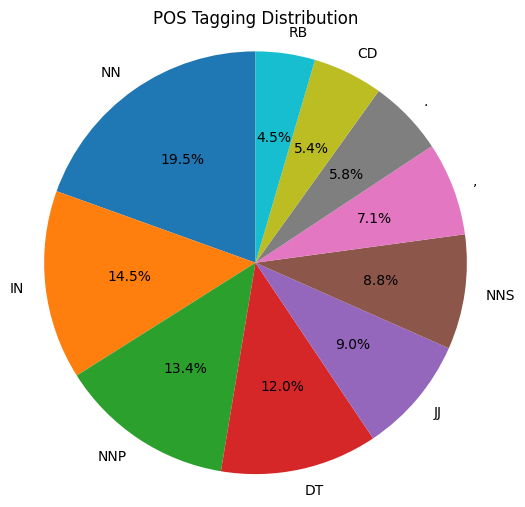

In [95]:
import matplotlib.pyplot as plt
from collections import Counter

# Get the list of all tags from the training data
all_tags = [tag for word, tag in train_data]

# Count the frequency of each tag
tag_counter = Counter(all_tags)

# Get the 10 most common tags
most_common_tags = tag_counter.most_common(10)

# Separate tags and their frequencies for plotting
tags, frequencies = zip(*most_common_tags)

# Create a pie chart of the tag frequencies
plt.figure(figsize=(6, 6))
plt.pie(frequencies, labels=tags, autopct='%1.1f%%', startangle=90)
plt.title('POS Tagging Distribution')
plt.axis('equal')
plt.show()


# Tag Prediction

In [96]:
def predict_tags(words, tagger):
    words = words.split()
    tagged_words = tagger.tag(words)
    return tagged_words
test_words = test_words_contents

In [97]:
predicted_tags = predict_tags(test_words_contents, tagger)
df_predicted_tags = pd.DataFrame(predicted_tags, columns=['Word', 'Tag'])

# Display the DataFrame
print(df_predicted_tags)


              Word  Tag
0              The   DT
1          economy   NN
2               's  POS
3      temperature   NN
4             will   MD
...            ...  ...
32848         them   IN
32849         here   IN
32850         with   IN
32851           us   IN
32852            .   IN

[32853 rows x 2 columns]


Conclusion:

The table shows the predicted POS tags for the corresponding words in the test sentence. This allows for a better understanding of how the HMM model categorizes each word in terms of its part of speech.